<a href="https://colab.research.google.com/github/samiraalshahrani/github-slideshow/blob/master/Machine%20Learning%20Model%201.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as warn
warn.simplefilter('ignore')

# Reading The Dataset

---





In [ ]:
!pip install opendatasets -q

In [ ]:
from google.colab import files
files.upload ()

Saving kaggle (8).json to kaggle (8).json


{'kaggle (8).json': b'{"username":"samiraalshahrani","key":"ba9602e37878f0c82d1f610dde75e62c"}'}

In [ ]:
import opendatasets as ds

ds.download("https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022")

Skipping, found downloaded files in "./flight-delay-dataset-20182022" (use force=True to force download)


In [ ]:
data = pd.read_parquet("/content/flight-delay-dataset-20182022/Combined_Flights_2022.parquet")

In [ ]:
data.dtypes.value_counts()

int64             23
float64           18
object            17
bool               2
datetime64[ns]     1
dtype: int64

In [ ]:
data.shape

(4078318, 61)

In [ ]:
df = data.sample(n=100000, random_state=0).reset_index(drop=True)
df = df[df.ArrDelay > 0]

In [ ]:
df.shape

(36473, 61)

In [ ]:
import sys
sys.getsizeof(df)

51938237

# Data Visualization

---



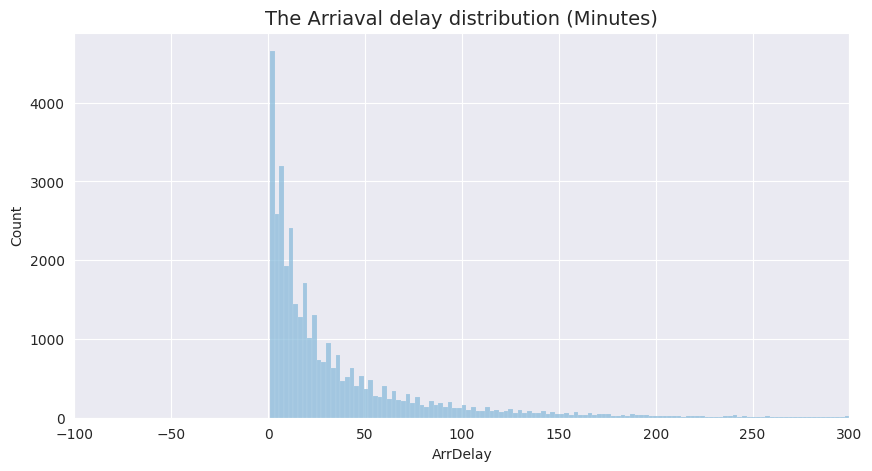

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Blues_d')
plt.rcParams['figure.figsize'] = (10,5)
sns.histplot(data=df, x="ArrDelay")
plt.xlim(-100, 300)
plt.title("The Arriaval delay distribution (Minutes)", fontsize=14)
plt.show()

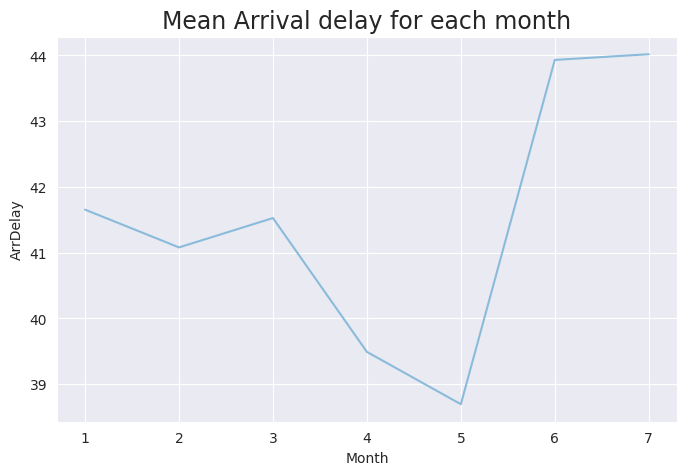

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="Month",y="ArrDelay", ci=None)
plt.title("Mean Arrival delay for each month", fontsize=17)
plt.show()

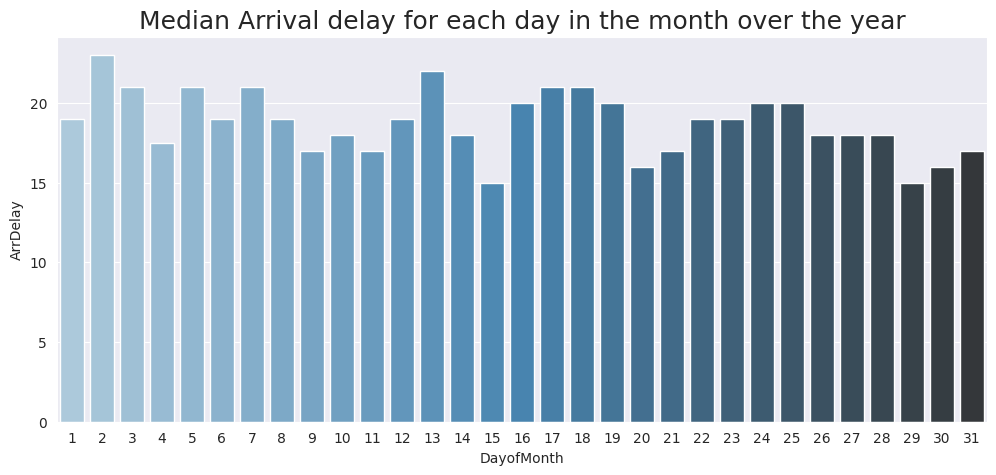

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,
            x="DayofMonth",
            y="ArrDelay",
            estimator=np.median,
            ci=None,
            palette='Blues_d')
plt.title("Median Arrival delay for each day in the month over the year", fontsize=18)
plt.show()

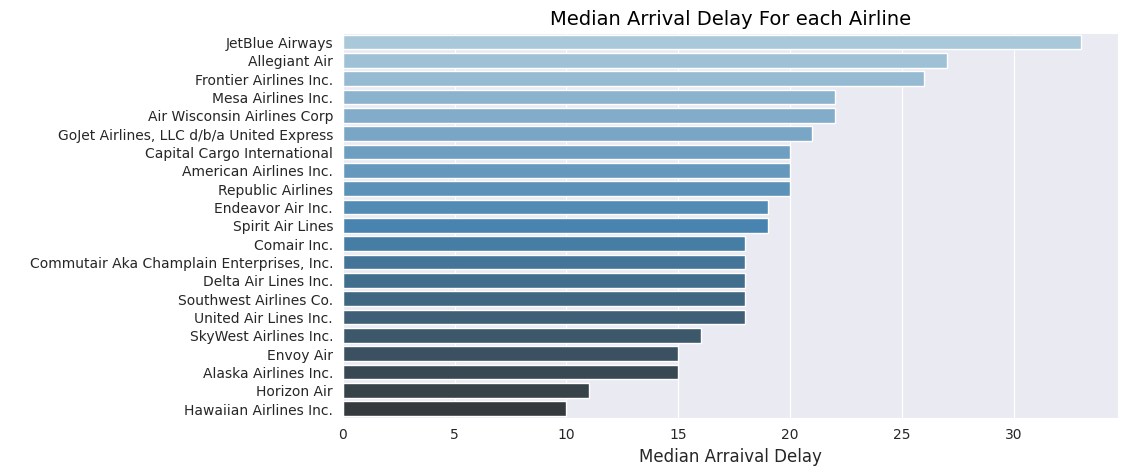

In [ ]:
mean_delay_df = df.groupby("Airline", as_index=False)\
                  ['ArrDelay'].median()\
                  .sort_values('ArrDelay', ascending=False)\
                  .reset_index(drop=True)\
                  .round(2)

sns.barplot(data=mean_delay_df, y='Airline', x='ArrDelay', palette='Blues_d')
plt.tick_params(axis='y', labelsize=10)
plt.ylabel(" ")
plt.xlabel("Median Arraival Delay", fontsize=12)
plt.title("Median Arrival Delay For each Airline", fontsize=14)

title = plt.gca().title
title.set_color('Black')

plt.show()

In [ ]:
pd.set_option('display.max.columns', 1000)
df.head(1)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
2,2022-02-17,United Air Lines Inc.,EWR,DFW,False,False,1400,1401.0,1.0,1.0,1710.0,15.0,219.0,235.0,249.0,1372.0,2022,1,2,17,4,UA,UA,19977,UA,662,UA,19977,UA,N17264,662,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,0.0,0.0,1400-1459,25.0,1426.0,1705.0,5.0,1655,15.0,1.0,1.0,1600-1659,6,0


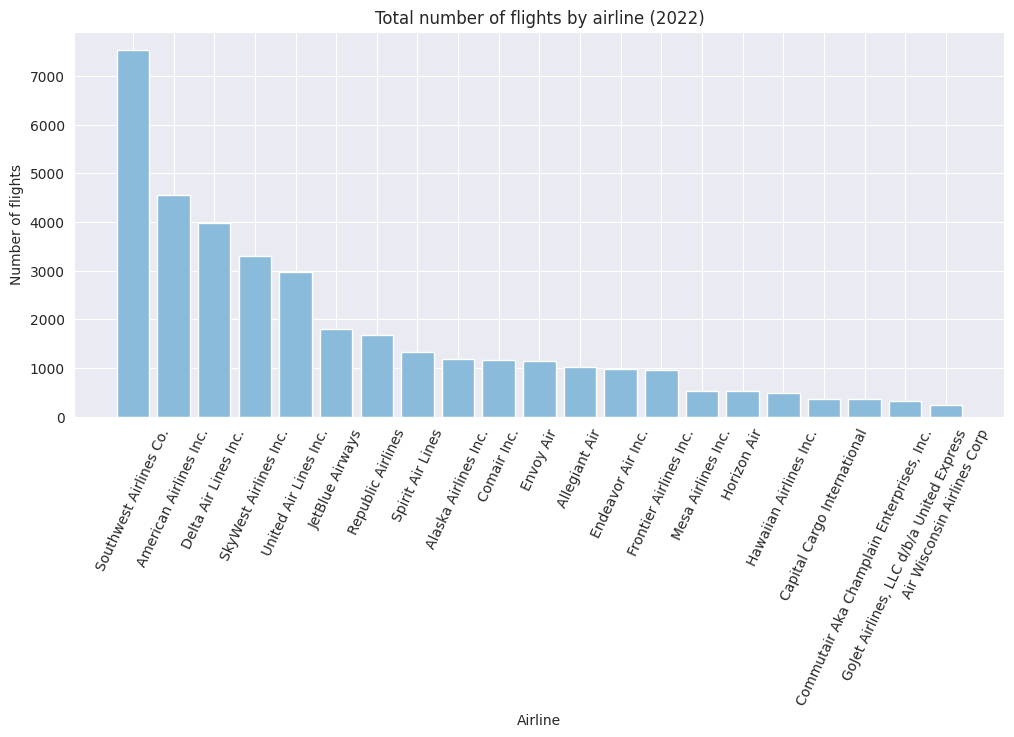

In [ ]:
airline_counts = df['Airline'].value_counts()

plt.figure(figsize=(12,5))
plt.bar(airline_counts.index, airline_counts.values)
plt.xticks(rotation=65)
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.title('Total number of flights by airline (2022)')
plt.show()

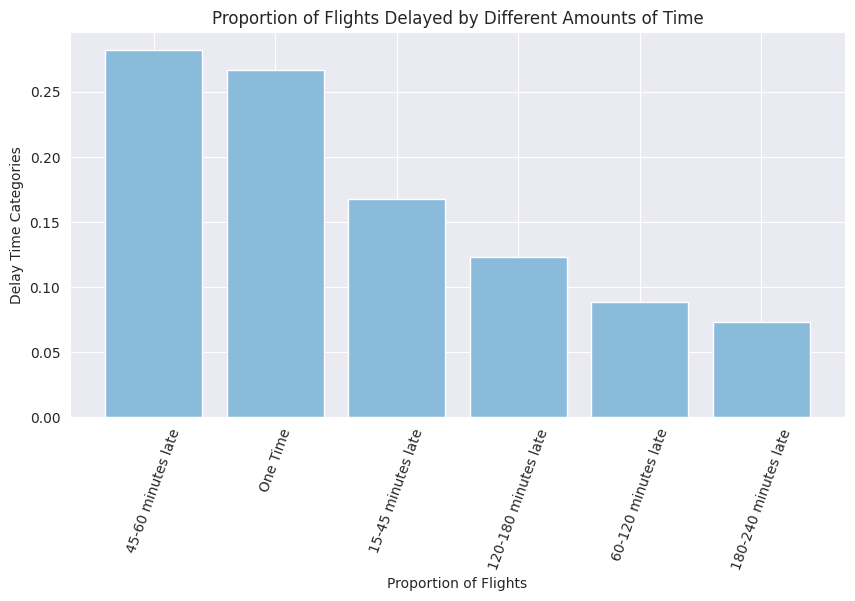

In [ ]:
bins = [0, 15, 30, 60, 120, 180, 240]
labels = ['One Time', '15-45 minutes late', '45-60 minutes late', '60-120 minutes late', '120-180 minutes late', '180-240 minutes late']
df['delay_category'] = pd.cut(df['DepTime'], bins=bins, labels=labels)
delay_counts = df['delay_category'].value_counts(normalize=True)


plt.bar(delay_counts.index, delay_counts.values)
plt.title('Proportion of Flights Delayed by Different Amounts of Time')
plt.xlabel('Proportion of Flights')
plt.ylabel('Delay Time Categories')
plt.xticks(rotation=70)
plt.show()

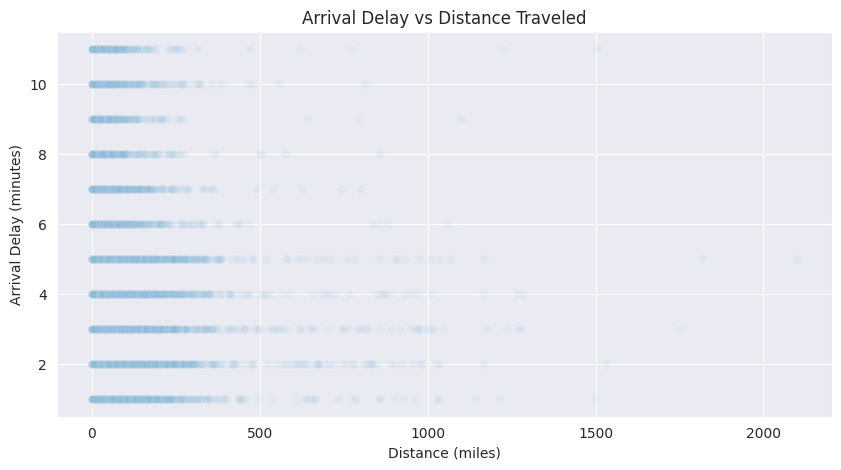

In [ ]:
sns.scatterplot(y= df['DistanceGroup'], x= df['ArrDelay'], alpha=0.1)
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay vs Distance Traveled')
plt.show()

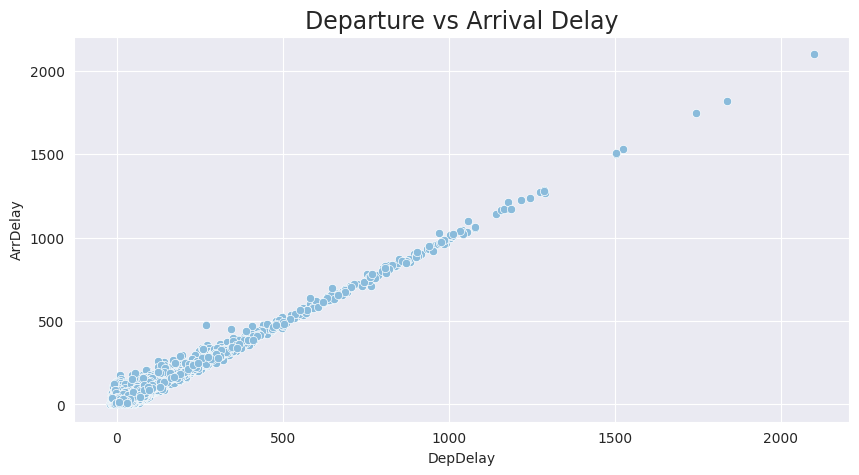

In [ ]:
sns.scatterplot(data=df, x="DepDelay", y="ArrDelay")
plt.title("Departure vs Arrival Delay", fontsize=17)
plt.show()

In [ ]:
text_data = df.select_dtypes(['object', 'bool'])
text_data.head()

,Airline,Origin,Dest,Cancelled,Diverted,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,IATA_Code_Marketing_Airline,Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,OriginCityName,OriginState,OriginStateName,DestCityName,DestState,DestStateName,DepTimeBlk,ArrTimeBlk
2,United Air Lines Inc.,EWR,DFW,False,False,UA,UA,UA,UA,UA,N17264,"Newark, NJ",NJ,New Jersey,"Dallas/Fort Worth, TX",TX,Texas,1400-1459,1600-1659
7,Delta Air Lines Inc.,PDX,LAX,False,False,DL,DL,DL,DL,DL,N145DQ,"Portland, OR",OR,Oregon,"Los Angeles, CA",CA,California,1600-1659,1900-1959
8,Spirit Air Lines,CLE,MCO,False,False,NK,NK,NK,NK,NK,N955NK,"Cleveland, OH",OH,Ohio,"Orlando, FL",FL,Florida,1900-1959,2200-2259
10,Horizon Air,SEA,OAK,False,False,AS,AS_CODESHARE,AS,QX,QX,N650QX,"Seattle, WA",WA,Washington,"Oakland, CA",CA,California,1000-1059,1200-1259
11,JetBlue Airways,FLL,JFK,False,False,B6,B6,B6,B6,B6,N317JB,"Fort Lauderdale, FL",FL,Florida,"New York, NY",NY,New York,0900-0959,1200-1259


In [ ]:
text_data = text_data.iloc[:, [-1, -2]]

In [ ]:
text_data.dtypes

ArrTimeBlk    object
DepTimeBlk    object
dtype: object

In [ ]:
text_data.iloc[:,1].value_counts()

1700-1759    2666
1800-1859    2641
1500-1559    2513
1600-1659    2435
1900-1959    2383
1300-1359    2362
1400-1459    2229
1200-1259    2139
1100-1159    2126
2000-2059    2103
1000-1059    2102
0800-0859    2005
0700-0759    1804
0900-0959    1797
0600-0659    1600
2100-2159    1511
2200-2259    1121
0001-0559     625
2300-2359     311
Name: DepTimeBlk, dtype: int64

In [ ]:
text_data['ArrTimeBlk'].value_counts()

1800-1859    2626
2100-2159    2561
2000-2059    2531
1900-1959    2507
1600-1659    2446
1700-1759    2410
2300-2359    2244
1400-1459    2172
1500-1559    2163
2200-2259    2098
1200-1259    1994
1300-1359    1872
1100-1159    1866
0900-0959    1651
1000-1059    1648
0001-0559    1235
0800-0859    1185
0700-0759     875
0600-0659     389
Name: ArrTimeBlk, dtype: int64

In [ ]:
text_data.isna().sum()

ArrTimeBlk    0
DepTimeBlk    0
dtype: int64

In [ ]:
text_data.shape

(36473, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# text_data['ArrTimeBlk_enc'] = le.fit_transform(text_data['ArrTimeBlk'])
# text_data['DepTimeBlk_enc'] = le.fit_transform(text_data['DepTimeBlk'])

for c in text_data.columns.to_list():
    text_data.loc[:,c] = le.fit_transform(text_data.loc[:,c])

In [ ]:
numeric_columns = df.select_dtypes('number')
numeric_columns.head()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
2,1400,1401.0,1.0,1.0,1710.0,15.0,219.0,235.0,249.0,1372.0,2022,1,2,17,4,19977,662,19977,662,11618,1161802,31703,34,21,11298,1129806,30194,48,74,0.0,0.0,25.0,1426.0,1705.0,5.0,1655,15.0,1.0,1.0,6,0
7,1651,1717.0,26.0,26.0,1957.0,41.0,127.0,145.0,160.0,834.0,2022,2,6,15,3,19790,2947,19790,2947,14057,1405702,34057,41,92,12892,1289208,32575,6,91,1.0,1.0,20.0,1737.0,1944.0,13.0,1916,41.0,1.0,2.0,4,0
8,1959,1954.0,0.0,-5.0,2231.0,1.0,131.0,151.0,157.0,895.0,2022,2,5,6,5,20416,708,20416,708,11042,1104205,30647,39,44,13204,1320402,31454,12,33,0.0,-1.0,13.0,2007.0,2218.0,13.0,2230,1.0,0.0,0.0,4,0
10,1045,1042.0,0.0,-3.0,1258.0,3.0,96.0,130.0,136.0,672.0,2022,1,1,26,3,19930,2209,19687,2209,14747,1474703,30559,53,93,13796,1379608,32457,6,91,0.0,-1.0,36.0,1118.0,1254.0,4.0,1255,3.0,0.0,0.0,3,0
11,912,1210.0,178.0,178.0,1456.0,174.0,141.0,170.0,166.0,1069.0,2022,2,4,16,6,20409,602,20409,602,11697,1169706,32467,12,33,12478,1247805,31703,36,22,1.0,11.0,18.0,1228.0,1449.0,7.0,1202,174.0,1.0,11.0,5,0


In [ ]:
numeric_columns.shape

(36473, 41)

In [ ]:
numeric_columns.isna().sum()

CRSDepTime                         0
DepTime                            0
DepDelayMinutes                    0
DepDelay                           0
ArrTime                            0
ArrDelayMinutes                    0
AirTime                            0
CRSElapsedTime                     0
ActualElapsedTime                  0
Distance                           0
Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
DOT_ID_Marketing_Airline           0
Flight_Number_Marketing_Airline    0
DOT_ID_Operating_Airline           0
Flight_Number_Operating_Airline    0
OriginAirportID                    0
OriginAirportSeqID                 0
OriginCityMarketID                 0
OriginStateFips                    0
OriginWac                          0
DestAirportID                      0
DestAirportSeqID                   0
DestCityMarketID                   0
D

In [ ]:
names = numeric_columns.columns.to_list()

ids = []
for col in names:
    if 'ID' in col:
        ids.append(col)

numeric_columns_without_ids =  numeric_columns.drop(ids, axis=1)

In [ ]:
numeric_columns_without_ids.head()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Flight_Number_Marketing_Airline,Flight_Number_Operating_Airline,OriginStateFips,OriginWac,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
2,1400,1401.0,1.0,1.0,1710.0,15.0,219.0,235.0,249.0,1372.0,2022,1,2,17,4,662,662,34,21,48,74,0.0,0.0,25.0,1426.0,1705.0,5.0,1655,15.0,1.0,1.0,6,0
7,1651,1717.0,26.0,26.0,1957.0,41.0,127.0,145.0,160.0,834.0,2022,2,6,15,3,2947,2947,41,92,6,91,1.0,1.0,20.0,1737.0,1944.0,13.0,1916,41.0,1.0,2.0,4,0
8,1959,1954.0,0.0,-5.0,2231.0,1.0,131.0,151.0,157.0,895.0,2022,2,5,6,5,708,708,39,44,12,33,0.0,-1.0,13.0,2007.0,2218.0,13.0,2230,1.0,0.0,0.0,4,0
10,1045,1042.0,0.0,-3.0,1258.0,3.0,96.0,130.0,136.0,672.0,2022,1,1,26,3,2209,2209,53,93,6,91,0.0,-1.0,36.0,1118.0,1254.0,4.0,1255,3.0,0.0,0.0,3,0
11,912,1210.0,178.0,178.0,1456.0,174.0,141.0,170.0,166.0,1069.0,2022,2,4,16,6,602,602,12,33,36,22,1.0,11.0,18.0,1228.0,1449.0,7.0,1202,174.0,1.0,11.0,5,0


In [ ]:
numeric_columns_without_ids['delay_hours'] = numeric_columns_without_ids['ArrDelay'] / 60

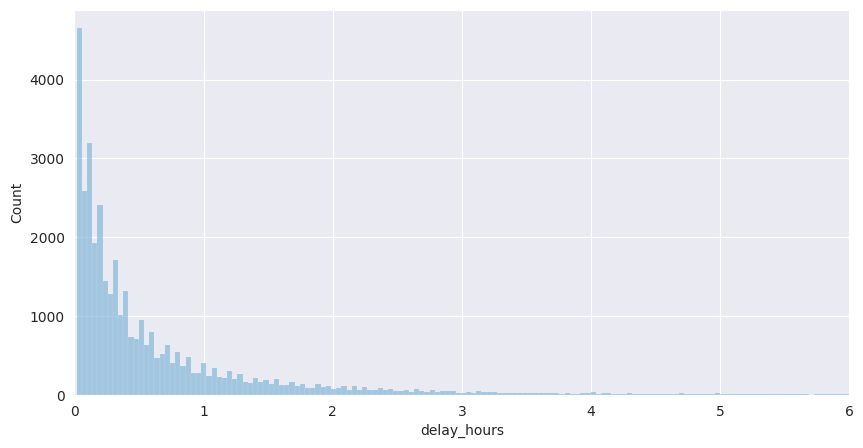

In [ ]:
sns.histplot(data=numeric_columns_without_ids, x="delay_hours")
plt.xlim(0,6)
plt.show()

In [ ]:
numeric_columns_without_ids.drop("ArrDelayMinutes", axis=1, inplace=True)

In [ ]:
df = pd.concat([text_data, numeric_columns_without_ids], axis=1)
df.shape

(36473, 35)

In [ ]:
df.head()

,ArrTimeBlk,DepTimeBlk,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Flight_Number_Marketing_Airline,Flight_Number_Operating_Airline,OriginStateFips,OriginWac,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings,delay_hours
2,11,9,1400,1401.0,1.0,1.0,1710.0,219.0,235.0,249.0,1372.0,2022,1,2,17,4,662,662,34,21,48,74,0.0,0.0,25.0,1426.0,1705.0,5.0,1655,15.0,1.0,1.0,6,0,0.250000
7,14,11,1651,1717.0,26.0,26.0,1957.0,127.0,145.0,160.0,834.0,2022,2,6,15,3,2947,2947,41,92,6,91,1.0,1.0,20.0,1737.0,1944.0,13.0,1916,41.0,1.0,2.0,4,0,0.683333
8,17,14,1959,1954.0,0.0,-5.0,2231.0,131.0,151.0,157.0,895.0,2022,2,5,6,5,708,708,39,44,12,33,0.0,-1.0,13.0,2007.0,2218.0,13.0,2230,1.0,0.0,0.0,4,0,0.016667
10,7,5,1045,1042.0,0.0,-3.0,1258.0,96.0,130.0,136.0,672.0,2022,1,1,26,3,2209,2209,53,93,6,91,0.0,-1.0,36.0,1118.0,1254.0,4.0,1255,3.0,0.0,0.0,3,0,0.050000
11,7,4,912,1210.0,178.0,178.0,1456.0,141.0,170.0,166.0,1069.0,2022,2,4,16,6,602,602,12,33,36,22,1.0,11.0,18.0,1228.0,1449.0,7.0,1202,174.0,1.0,11.0,5,0,2.900000


##Feature Engineering
---
### Binning the delay column to categorical

In [ ]:
df['class'] = pd.cut(df.delay_hours,
                    bins=[0,.15,.45,35],
                     labels=['Small', 'Medium', 'Large'])

In [ ]:
df['class'].value_counts()

Large     14214
Small     11431
Medium    10828
Name: class, dtype: int64

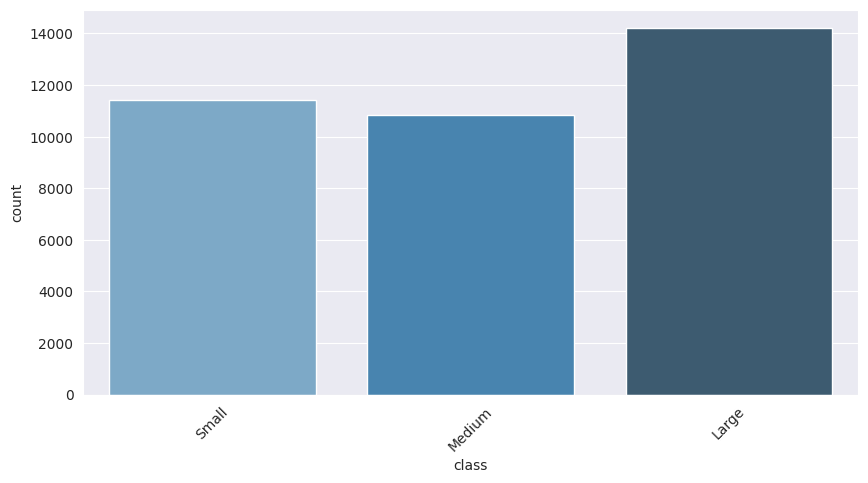

In [ ]:
sns.countplot(data = df, x='class', palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head(1)

,ArrTimeBlk,DepTimeBlk,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Flight_Number_Marketing_Airline,Flight_Number_Operating_Airline,OriginStateFips,OriginWac,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings,delay_hours,class
2,11,9,1400,1401.0,1.0,1.0,1710.0,219.0,235.0,249.0,1372.0,2022,1,2,17,4,662,662,34,21,48,74,0.0,0.0,25.0,1426.0,1705.0,5.0,1655,15.0,1.0,1.0,6,0,0.25,Medium


# Data Resampling

---



In [ ]:
from imblearn.over_sampling import RandomOverSampler

features = df.drop('class', axis=1)
target = df['class']

target = pd.Series(le.fit_transform(target))
sampler = RandomOverSampler(random_state=42)
features, target = sampler.fit_resample(features, target)

In [ ]:
target.value_counts()

1    14214
0    14214
2    14214
dtype: int64

#Data Splitting

---



In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features, target,
                                                                            test_size=0.2,
                                                                            shuffle=True,
                                                                            stratify=target,
                                                                            random_state=42)

In [ ]:
test_target.value_counts()

2    2843
1    2843
0    2843
dtype: int64

## Data Scaling

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_features)

X_train = scaler.transform(train_features)
X_test = scaler.transform(test_features)

X_train = pd.DataFrame(X_train, columns=scaler.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=scaler.get_feature_names_out())

# Model Building

## Support Vector Machine

---



In [ ]:
!pip install scikit-plot -q

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import *
import scikitplot as skplt

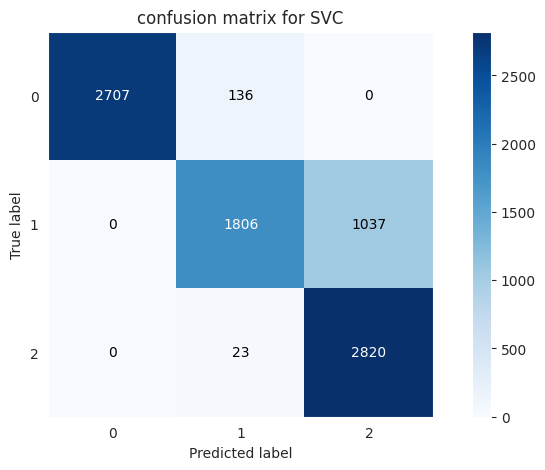

In [ ]:
model = SVC(probability=True)
model.fit(X_train, train_target)

preds_svc = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(test_target, preds_svc, title="confusion matrix for SVC")
plt.show()

In [ ]:
def model_evaluate(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precison = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1score = f1_score(y_true, y_pred, average="weighted")

    return acc, precison, recall, f1score

In [ ]:
svc_accuracy , svc_prec, svc_recall, svc_fscore = model_evaluate(test_target, preds_svc)

one_vs_rest = OneVsRestClassifier(model).fit(X_train, train_target)
svc_proba = one_vs_rest.predict_proba(X_test)
svc_proba = roc_auc_score(test_target, svc_proba, multi_class='ovr', average='macro')

## Naïve Bayes

---




In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, train_target)

MultinomialNB()

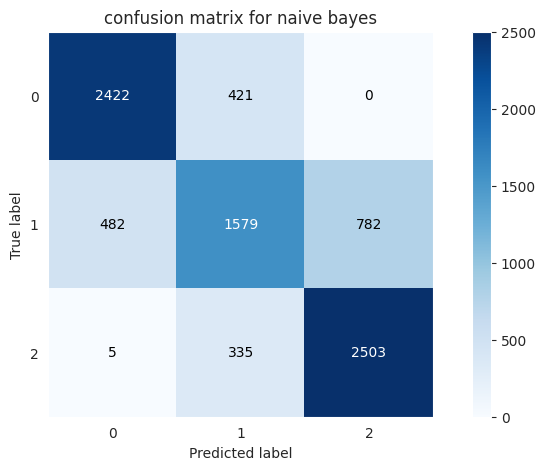

In [ ]:
preds_naive_bais = nb.predict(X_test)
skplt.metrics.plot_confusion_matrix(test_target, preds_naive_bais, title="confusion matrix for naive bayes")
plt.show()

In [ ]:
one_vs_rest = OneVsRestClassifier(nb).fit(X_train, train_target)
nb_proba = one_vs_rest.predict_proba(X_test)
nb_proba = roc_auc_score(test_target, nb_proba, multi_class='ovr', average='macro')

In [ ]:
nb_accuracy , nb_prec, nb_recall, nb_fscore = model_evaluate(test_target, preds_naive_bais)

## KNN

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, train_target)

KNeighborsClassifier()

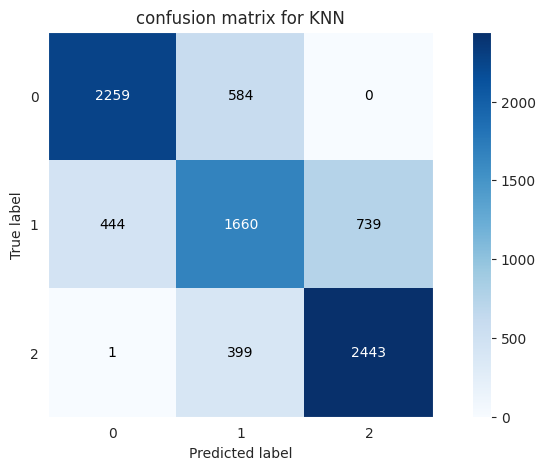

In [ ]:
preds_knn = knn.predict(X_test)
skplt.metrics.plot_confusion_matrix(test_target, preds_knn, title="confusion matrix for KNN")
plt.show()

In [ ]:
knn_accuracy , knn_prec, knn_recall, knn_fscore = model_evaluate(test_target, preds_knn)

one_vs_rest = OneVsRestClassifier(knn).fit(X_train, train_target)
knn_proba = one_vs_rest.predict_proba(X_test)
knn_proba = roc_auc_score(test_target, knn_proba, multi_class='ovr', average='macro')

## Random Forest Classifier

---



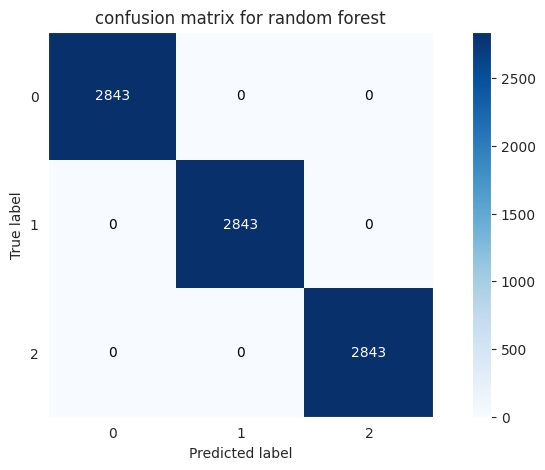

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, train_target)



preds_rf = rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(test_target, preds_rf, title="confusion matrix for random forest")
plt.show()

In [ ]:
rf_accuracy , rf_prec, rf_recall, rf_fscore = model_evaluate(test_target, preds_rf)

one_vs_rest = OneVsRestClassifier(rf).fit(X_train, train_target)
rf_proba_ = one_vs_rest.predict_proba(X_test)
rf_proba = roc_auc_score(test_target, rf_proba_, multi_class='ovr', average='macro')
rf_proba

1.0

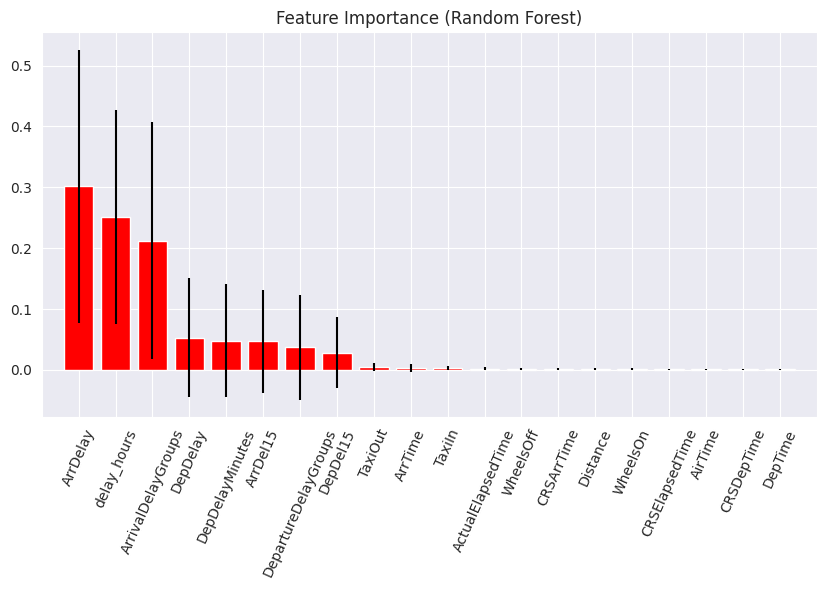

In [ ]:
skplt.estimators.plot_feature_importances(rf, feature_names=X_test.columns.to_list(), title="Feature Importance (Random Forest)")
plt.xticks(rotation=66)
plt.show()

## Decision Tree Classifier

---



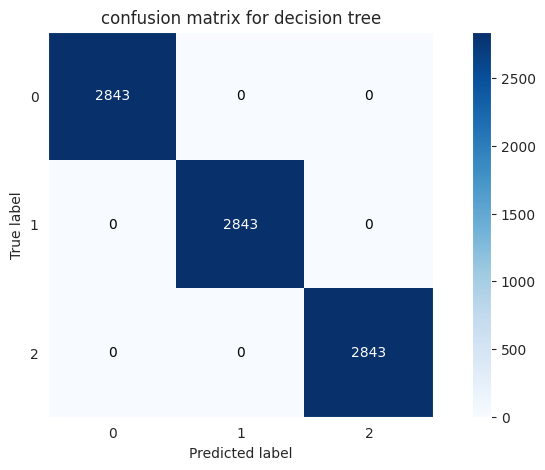

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, train_target)



preds_dt = dt.predict(X_test)
skplt.metrics.plot_confusion_matrix(test_target, preds_dt, title="confusion matrix for decision tree")
plt.show()

In [ ]:
dt_accuracy , dt_prec, dt_recall, dt_fscore = model_evaluate(test_target, preds_dt)

one_vs_rest = OneVsRestClassifier(dt).fit(X_train, train_target)
dt_proba = one_vs_rest.predict_proba(X_test)
dt_proba = roc_auc_score(test_target, dt_proba, multi_class='ovr', average='macro')
dt_proba

1.0

## Logistic Regression

---



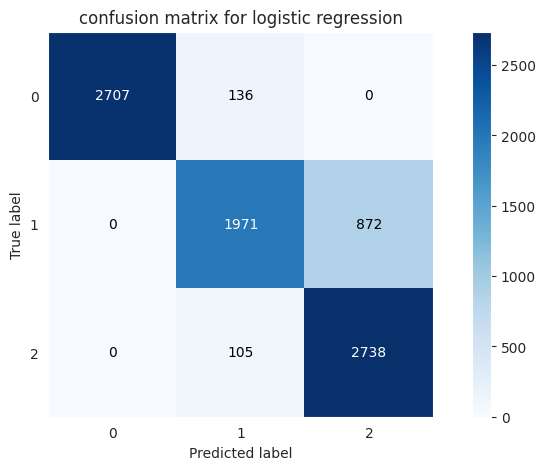

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, train_target)



preds_lr = lr.predict(X_test)
skplt.metrics.plot_confusion_matrix(test_target, preds_lr, title="confusion matrix for logistic regression")
plt.show()

In [ ]:
lr_accuracy , lr_prec, lr_recall, lr_fscore = model_evaluate(test_target, preds_lr)

one_vs_rest = OneVsRestClassifier(lr).fit(X_train, train_target)
lr_proba = one_vs_rest.predict_proba(X_test)
lr_proba = roc_auc_score(test_target, lr_proba, multi_class='ovr', average='macro')
lr_proba

0.9644850757880655

# Comparing ML Models

---



In [ ]:
evaluation_dict = {
    'Model':['SVC', 'NaiveBayes','KNN','RandomFores','DecisionTree','LogisticRegression'],
    'Accuracy':[svc_accuracy, nb_accuracy,knn_accuracy, rf_accuracy, dt_accuracy, lr_accuracy],
    'Precision':[svc_prec, nb_prec, knn_prec, rf_prec, dt_prec, lr_prec],
    'Recall':[svc_recall, nb_prec, knn_prec, rf_prec, dt_prec, lr_prec],
    'F1-score':[svc_fscore, nb_fscore, knn_fscore, rf_fscore, dt_fscore, lr_fscore],
    'roc-auc':[svc_proba, nb_proba, knn_proba, rf_proba, dt_proba, lr_proba]
}

comp_df = pd.DataFrame(evaluation_dict)
comp_df.round(2)

,Model,Accuracy,Precision,Recall,F1-score,roc-auc
0,SVC,0.86,0.88,0.86,0.86,0.97
1,NaiveBayes,0.76,0.76,0.76,0.76,0.91
2,KNN,0.75,0.74,0.74,0.74,0.89
3,RandomFores,1.00,1.00,1.00,1.00,1.00
4,DecisionTree,1.00,1.00,1.00,1.00,1.00
5,LogisticRegression,0.87,0.88,0.88,0.87,0.96


## Final Output

---



In [ ]:
def predict_with_rf(data):
    prediction = rf.predict(data)
    if prediction == 0:
        return "On Time"
    else:
        return "Delay" #this is a comment

In [ ]:
sample = X_test.iloc [:20,:]
for i in range(len(sample)):
    print(predict_with_rf([sample.iloc[i,:]]))

Delay
Delay
Delay
Delay
On Time
Delay
Delay
Delay
On Time
Delay
On Time
Delay
On Time
On Time
On Time
On Time
On Time
Delay
Delay
On Time
